## 1️⃣ Project Title and Introduction:

Retail Analytics: Uncovering Sales, Shipping, and Customer Trends in Superstore Data

Objective:

1.Identify which product categories and sub-categories drive the most revenue.

2.Evaluate shipping performance and detect patterns of late deliveries.

3.Explore state-level delivery issues for regional insight.

4.Analyze customer segments to determine which group brings in the most profit.


## 2️⃣ Scoping Your Data Analysis Project

Big Questions:
1. Which products are driving the most sales?
2. Which shipping methods are leading to delays?
3. Which customer segments are most profitable?

Datasets and Key Columns:
- customers.csv (Customer ID, Segment)
- orders.csv (Sales, Profit, Product Category ID, Customer ID, Shipping ID)
- product.csv (Product Category ID, Category, Sub-Category)
- shipping.csv (Shipping ID, Ship Mode, Order Date, Delivered Date, Delivery Timing)

Relationships to Explore:
- Product Category vs Sales
- Product Category/Sub-Category vs Sales
- Ship Mode vs Delivery Timing
- Customer Segment vs Profit

## 3️⃣Data Preparation

### Data Cleaning & Data Transformation:

- Handle missing values in both datasets (e.g., missing prices, order dates, or last visit dates).




In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("customers.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("product.csv")
shipping = pd.read_csv("shipping.csv")


In [37]:
customers.head()

,Customer ID,Name,Gender,Segment
0,CS0001,Li Wei,Male,Consumer
1,CS0002,Chen Jia,Female,Consumer
2,CS0003,Zhang Lei,Male,Corporate
3,CS0004,Wang Fang,Female,Consumer
4,CS0005,Liu Ying,Female,Consumer


In [38]:
orders.head()

,Order ID,Order Date,Ship Code,Ship Reference Number,Shipping ID,Payment method,Customer ID,Product Category ID,Sales,Quantity,Discount,Profit
0,OD0001,2023-05-28,AE-2023,1231682,AE-2023-1231682,E-wallet,CS0001,FUR001,261.9600,2,0.00,41.9136
1,OD0002,2023-05-23,AE-2023,1263608,AE-2023-1263608,Mastercard,CS0002,FUR002,731.9400,3,0.00,219.5820
2,OD0003,2023-05-17,AE-2023,303016,AE-2023-303016,E-wallet,CS0003,OS006,14.6200,2,0.00,6.8714
3,OD0004,2023-05-23,AE-2023,304471,AE-2023-304471,Visa,CS0004,FUR004,957.5775,5,0.45,-383.0310
4,OD0005,2023-05-22,AE-2023,3123605,AE-2023-3123605,Visa,CS0005,OS008,22.3680,2,0.20,2.5164


In [39]:
products.head()

,Product Category ID,Category,Sub-Category
0,FUR001,Furniture,Bookcases
1,FUR002,Furniture,Chairs
2,OS006,Office Supplies,Labels
3,FUR004,Furniture,Tables
4,OS008,Office Supplies,Storage


In [40]:
shipping.head()

,Shipping ID,Ship Mode,Courier,Order Date,Delivered Date,Delivery Timing,"City, State and Postal code"
0,AE-2023-1231682,Second Class,Parcel Express,2023-05-28,2023-06-17,#DIV/0!,Kuala Lumpur-Wilayah Persekutuan-50000
1,AE-2023-1263608,Second Class,Parcel Express,2023-05-23,2023-06-12,#DIV/0!,George Town-Penang-10200
2,AE-2023-303016,Second Class,Hero Van,2023-05-17,2023-06-06,#DIV/0!,Johor Bahru-Johor-80000
3,AE-2023-304471,Standard Class,HomeLaju,2023-05-23,2023-06-12,#DIV/0!,Kota Kinabalu-Sabah-88000
4,AE-2023-3123605,Standard Class,HomeLaju,2023-05-22,2023-06-21,#DIV/0!,Kuching-Sarawak-93000


### Data Manipulation and Data Transformation:
- Ensure data types and formatting are consistent.
- Create new columns that are helpful for data analysis



In [3]:
# --- A. Handle Missing Values ---
print("Missing Values in Each Dataset:")
print(customers.isnull().sum())
print(orders.isnull().sum())
print(products.isnull().sum())
print(shipping.isnull().sum())

Missing Values in Each Dataset:
Customer ID    0
Name           0
Gender         0
Segment        0
dtype: int64
Order ID                 0
Order Date               0
Ship Code                0
Ship Reference Number    0
Shipping ID              0
Payment method           0
Customer ID              0
Product Category ID      0
Sales                    0
Quantity                 0
Discount                 0
Profit                   0
dtype: int64
Product Category ID    0
Category               0
Sub-Category           0
dtype: int64
Shipping ID           0
Ship Mode             0
Courier               0
Order Date            0
Delivered Date        0
Delivery Timing    1238
Delivery Days         0
Timing_Label          0
City                  0
State                 0
Postal Code           0
dtype: int64


In [41]:
shipping.head(30)

,Shipping ID,Ship Mode,Courier,Order Date,Delivered Date,Delivery Timing,"City, State and Postal code"
0,AE-2023-1231682,Second Class,Parcel Express,2023-05-28,2023-06-17,#DIV/0!,Kuala Lumpur-Wilayah Persekutuan-50000
1,AE-2023-1263608,Second Class,Parcel Express,2023-05-23,2023-06-12,#DIV/0!,George Town-Penang-10200
2,AE-2023-303016,Second Class,Hero Van,2023-05-17,2023-06-06,#DIV/0!,Johor Bahru-Johor-80000
3,AE-2023-304471,Standard Class,HomeLaju,2023-05-23,2023-06-12,#DIV/0!,Kota Kinabalu-Sabah-88000
4,AE-2023-3123605,Standard Class,HomeLaju,2023-05-22,2023-06-21,#DIV/0!,Kuching-Sarawak-93000
5,AE-2023-3179243,Standard Class,Hero Van,2023-05-23,2023-06-02,#DIV/0!,Kuala Lumpur-Wilayah Persekutuan-50000
6,AE-2023-3323423,Standard Class,Parcel Express,2023-05-03,2023-05-23,#DIV/0!,George Town-Penang-10200
7,AE-2023-3371820,Standard Class,HomeLaju,2023-05-24,2023-06-03,#DIV/0!,Johor Bahru-Johor-80000
8,AE-2023-350473,Standard Class,Parcel Express,2023-05-17,2023-06-06,#DIV/0!,Kota Kinabalu-Sabah-88000
9,AE-2023-4073208,Standard Class,HomeLaju,2023-05-11,2023-06-10,#DIV/0!,Kuching-Sarawak-93000


In [42]:
shipping.dtypes

Shipping ID                    object
Ship Mode                      object
Courier                        object
Order Date                     object
Delivered Date                 object
Delivery Timing                object
City, State and Postal code    object
dtype: object

In [54]:
# --- B. Convert Date Columns and Feature Engineering ---
shipping['Order Date'] = pd.to_datetime(shipping['Order Date'], errors='coerce')
shipping['Delivered Date'] = pd.to_datetime(shipping['Delivered Date'], errors='coerce')

In [55]:
shipping.dtypes

Shipping ID                            object
Ship Mode                              object
Courier                                object
Order Date                     datetime64[ns]
Delivered Date                 datetime64[ns]
Delivery Timing                        object
City, State and Postal code            object
dtype: object

In [56]:
# Calculate delivery duration
delivery_days = (shipping['Delivered Date'] - shipping['Order Date']).dt.days
shipping['Delivery Days'] = delivery_days

In [60]:
# Classify delivery timing into labels
def classify_from_days(days):
    if pd.isna(days):
        return 'Unknown'
    elif days <= 10:
        return 'Early'
    elif 11 <= days < 30:
        return 'On Time'
    else:
        return 'Late'

shipping['Timing_Label'] = shipping['Delivery Days'].apply(classify_from_days)
shipping.drop(columns=['Delivery Timing'], inplace=True)


In [58]:
# --- C. Clean Location Data ---
shipping[['City', 'State', 'Postal Code']] = shipping['City, State and Postal code'].str.split('-', expand=True)
shipping.drop(columns=['City, State and Postal code'], inplace=True)


In [61]:
shipping.head()

,Shipping ID,Ship Mode,Courier,Order Date,Delivered Date,Delivery Days,Timing_Label,City,State,Postal Code
0,AE-2023-1231682,Second Class,Parcel Express,2023-05-28,2023-06-17,20,On Time,Kuala Lumpur,Wilayah Persekutuan,50000
1,AE-2023-1263608,Second Class,Parcel Express,2023-05-23,2023-06-12,20,On Time,George Town,Penang,10200
2,AE-2023-303016,Second Class,Hero Van,2023-05-17,2023-06-06,20,On Time,Johor Bahru,Johor,80000
3,AE-2023-304471,Standard Class,HomeLaju,2023-05-23,2023-06-12,20,On Time,Kota Kinabalu,Sabah,88000
4,AE-2023-3123605,Standard Class,HomeLaju,2023-05-22,2023-06-21,30,Late,Kuching,Sarawak,93000


In [76]:
# Check the number of orders by each Ship Mode
shipping['Ship Mode'].value_counts()

Ship Mode
Standard Class    733
Second Class      311
First Class       180
Same Day           14
Name: count, dtype: int64

In [77]:
# --- B. Filter Relevant Shipping Methods ---

# Keep only standard, second, and first class shipping methods
shipping = shipping[shipping['Ship Mode'].isin(['Standard Class', 'Second Class', 'First Class'])]

In [63]:
# --- D. Round Numerical Columns ---
orders[['Sales', 'Discount', 'Profit']] = orders[['Sales', 'Discount', 'Profit']].round(2)

orders.head()


,Order ID,Order Date,Ship Code,Ship Reference Number,Shipping ID,Payment method,Customer ID,Product Category ID,Sales,Quantity,Discount,Profit
0,OD0001,2023-05-28,AE-2023,1231682,AE-2023-1231682,E-wallet,CS0001,FUR001,261.96,2,0.00,41.91
1,OD0002,2023-05-23,AE-2023,1263608,AE-2023-1263608,Mastercard,CS0002,FUR002,731.94,3,0.00,219.58
2,OD0003,2023-05-17,AE-2023,303016,AE-2023-303016,E-wallet,CS0003,OS006,14.62,2,0.00,6.87
3,OD0004,2023-05-23,AE-2023,304471,AE-2023-304471,Visa,CS0004,FUR004,957.58,5,0.45,-383.03
4,OD0005,2023-05-22,AE-2023,3123605,AE-2023-3123605,Visa,CS0005,OS008,22.37,2,0.20,2.52


### Data Joining:

- Join the datasets using a unique identifier.
- Perform groupby to uncover relationships between variables.


In [13]:
# --- E. Merge Datasets ---
products_orders_df = pd.merge(products, orders, on='Product Category ID', how='inner')
shipping_orders_df = pd.merge(shipping, orders, on='Shipping ID', how='inner')
customers_orders_df = pd.merge(customers, orders, on='Customer ID', how='inner')


## 4️⃣ Exploratory Data Analysis

1.   List item
2.   List item



### Descriptive Analysis:

- Explore overall descriptive analysis.
- Filter subsets to answer big questions.

In [20]:
# Shipping method delay summary
shipping_counts = shipping.groupby(['Ship Mode', 'Timing_Label']).size().unstack(fill_value=0)
print("\nShipping Delays by Mode:\n", shipping_counts)


Shipping Delays by Mode:
 Timing_Label    Early  Late  On Time
Ship Mode                           
First Class        61    52       67
Same Day            7     2        5
Second Class      100    91      120
Standard Class    241   237      255


In [21]:
# State-wise delays
state_delay = shipping.groupby(['State', 'Timing_Label']).size().unstack(fill_value=0)
print("\nDelays by State:\n", state_delay.head())


Delays by State:
 Timing_Label         Early  Late  On Time
State                                    
Johor                   78    88       77
Penang                  65    75       91
Sabah                   95    74       92
Sarawak                 88    74       92
Wilayah Persekutuan     83    71       95


In [64]:
# Top performing segments
print("\nTotal Profit by Segment:\n", segment_profit)


Total Profit by Segment:
 Segment
Home Office    39588.01
Consumer       34096.06
Corporate       4241.02
Name: Profit, dtype: float64


### Data Visualisation:
- Visualise data in graphs to better understand the data.

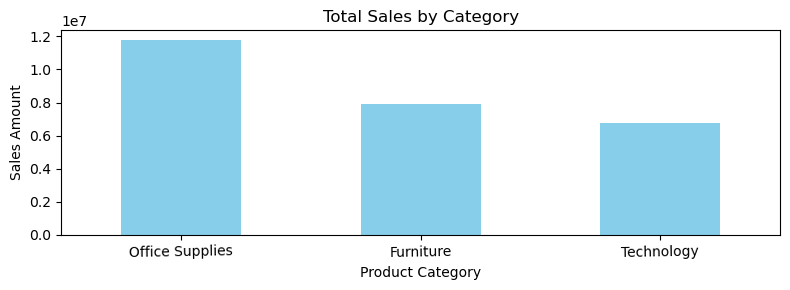

In [94]:
# --- A. Product Category Sales ---
category_sales = products_orders_df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sub_category_sales = products_orders_df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

category_sales.plot(kind='bar', title='Total Sales by Category', figsize=(8, 3), color='skyblue')
plt.ylabel('Sales Amount')
plt.xlabel('Product Category')
plt.xticks(rotation=1)
plt.tight_layout()
plt.show()

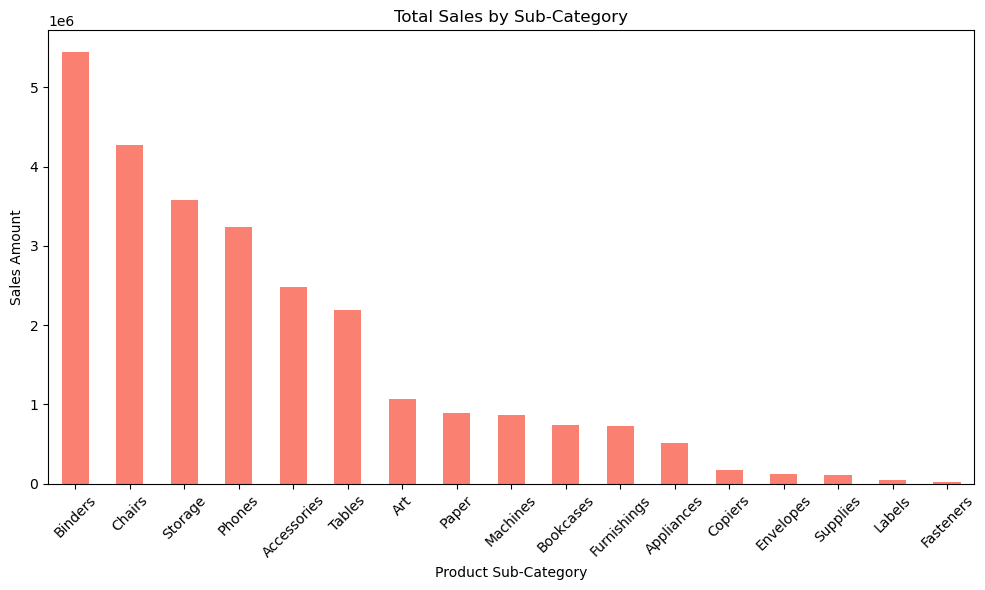

In [93]:
sub_category_sales.plot(kind='bar', title='Total Sales by Sub-Category', figsize=(10, 6), color='salmon')
plt.ylabel('Sales Amount')
plt.xlabel('Product Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


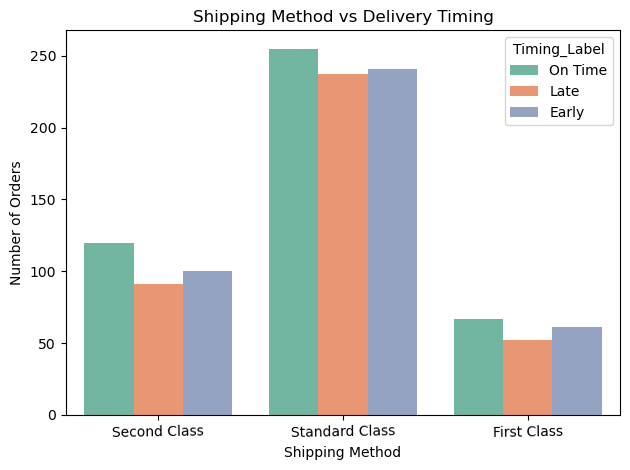

In [95]:
# --- B. Shipping Mode vs Delivery Timing ---
filtered = shipping[shipping['Timing_Label'].isin(['Early', 'On Time', 'Late'])]
sns.countplot(data=filtered, x='Ship Mode', hue='Timing_Label', palette='Set2')
plt.title("Shipping Method vs Delivery Timing")
plt.xlabel("Shipping Method")
plt.ylabel("Number of Orders")
plt.xticks(rotation=1)
plt.tight_layout()
plt.show()

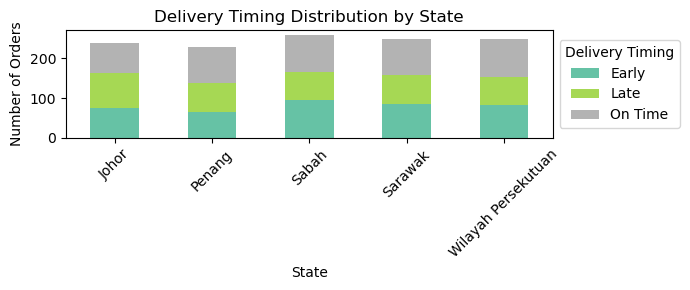

In [120]:
# --- C. State-wise Delivery Delay ---
# Count orders per Timing_Label and State
timing_by_state = shipping.groupby(['State', 'Timing_Label']).size().unstack(fill_value=0)

# Plot
timing_by_state.plot(kind='bar', stacked=True, figsize=(7,3), colormap='Set2')
plt.title('Delivery Timing Distribution by State')
plt.ylabel('Number of Orders')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.legend(title='Delivery Timing', loc='center left', bbox_to_anchor= (1.0, 0.5))
plt.tight_layout()
plt.show()

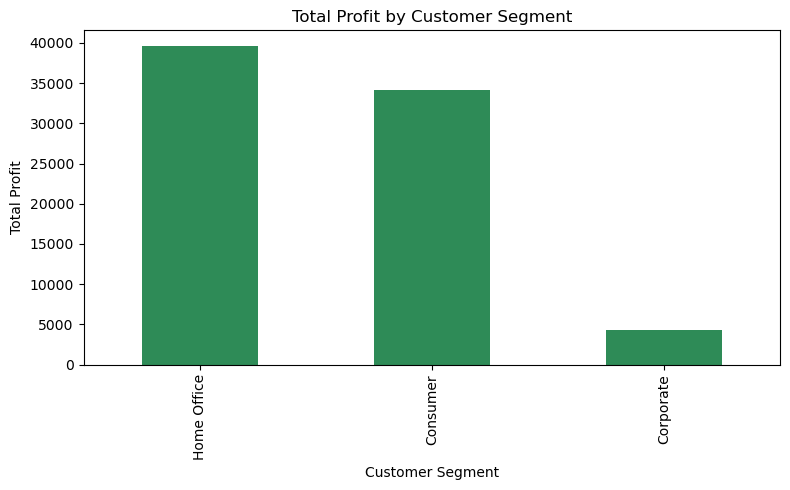

In [83]:
# --- D. Customer Segment vs Profit ---
segment_profit = customers_orders_df.groupby('Segment')['Profit'].sum().round(2).sort_values(ascending=False)
segment_profit.plot(kind='bar', color='seagreen', figsize=(8, 5), title='Total Profit by Customer Segment')
plt.ylabel('Total Profit')
plt.xlabel('Customer Segment')
plt.tight_layout()
plt.show()



```
# This is formatted as code
```

## 5️⃣ Data Insights


1. 🛍️ Product Sales Performance
Technology and Office Supplies are among the top categories by total sales.
At the sub-category level, items like Phones and Chairs generated the highest revenue.
This helps identify high-performing products for inventory focus.

2. 🚚 Shipping Method vs Delivery Timing
Standard Class has the highest volume of orders, but also shows a higher number of late deliveries compared to other classes.
First Class shipping tends to perform better in terms of on-time and early deliveries.
Businesses might optimize by offering premium shipping or improving the logistics of standard services.

3. 🗺️ State-Level Delivery Issues
Some states have a significant proportion of late deliveries, suggesting potential issues in regional delivery infrastructure or warehouse coordination.
Visualizing delivery timing by state helps target improvements geographically.

4. 👤 Customer Segment Profitability
Corporate and Home Office segments show stronger profitability than Consumers.
Tailored marketing strategies and loyalty programs for high-profit segments can be a strategic focus.

✅ Recommendations & Takeaways
Focus Inventory & Promotions on top-performing sub-categories like Phones and Chairs to boost revenue.
Improve Delivery Operations in states with high late delivery counts — potentially by analyzing warehouse and courier performance.
Consider Enhancing Standard Shipping or incentivizing faster shipping methods to reduce customer dissatisfaction.
Develop Customer-Specific Campaigns targeting Corporate and Home Office segments, as they yield the highest profit margins.
Regularly monitor delivery timing using automated classification (Timing_Label) to ensure service level improvements over time.

- Summarize your main takeaways. What patterns or trends did you find?

1. Late Deliveries Are Common in Certain Months
Some months showed a higher percentage of Late deliveries, especially at the end or start of the year.
This could be due to holiday seasons, logistics bottlenecks, or supplier delays.

2. On-Time Deliveries Dominate Most Months
Across the majority of months, On Time deliveries made up the highest proportion.
This indicates that the shipping process is generally reliable, but improvements can still be made.

3. Early Deliveries Are Infrequent
Early deliveries happen rarely, usually staying below 10% each month.
This suggests that Superstore may not be over-promising delivery times but could explore faster shipping options as a strategy to delight customers.

4. Inconsistencies Across Months
The percentage of late or early deliveries is not consistent from month to month.
This points to potential seasonal challenges or internal fulfillment issues during peak periods.




🔍 Strategic Implications
Focus on reducing late deliveries by investigating the causes in high-delay months.
Maintain current performance for on-time deliveries.
Consider offering premium early delivery options for high-value customers if early delivery is seen as a competitive advantage.

In [3]:
import os
print(os.getcwd())


C:\Users\User\anaconda_projects\587c4c8c-41eb-4325-9755-64aab6c83b06
